# Projeto 1 

Este codigo junta e limpa os dados sobre o IDH, Produção de energia hidrelétrica per capita e porcentagem de área coberta por 
florestas e pretende responder se exixte alguma relação entre esses dados e o IDH.

# Importando dados

dados fornecidos pelo gapminder

In [287]:
import pandas as pd
import matplotlib.pyplot as plt

idh = pd.read_excel('hdi_human_development_index.xlsx')
hydro = pd.read_excel('hydro_power_generation_per_person.xlsx')
cover = pd.read_excel('forest_coverage_percent.xlsx')


Criando o dataframe

In [288]:
cover_2010 = cover.loc[:, ["Países", 2010]]
cover_idx = cover_2010.set_index("Países")

In [289]:
hydro_2010 = hydro.loc[:, ["Países", 2010]]
hydro_idx = hydro_2010.set_index("Países")

In [290]:
idh_2010 = idh.loc[:, ["Países", 2010]]
idh_idx = idh_2010.set_index("Países")

Removendo os países sem dados

In [291]:
df = idh_idx.join(hydro_idx, how='inner', lsuffix=' IDH', rsuffix=' Produção de energia hidrelétrica por pessoa')
df['2010 porcentagem de area florestada'] = cover_idx[2010]
data = df.dropna()
data.head(14)

,2010 IDH,2010 Produção de energia hidrelétrica por pessoa,2010 porcentagem de area florestada
Países,,,
Albania,0.738,0.20300,28.30
Algeria,0.724,0.00042,0.81
Angola,0.495,0.01590,46.90
Argentina,0.816,0.07150,10.40
Armenia,0.729,0.07110,11.60
Australia,0.927,0.04810,16.00
Austria,0.880,0.39300,46.80
Azerbaijan,0.741,0.03230,12.20
Bangladesh,0.545,0.00096,11.10


In [292]:
dh = data.sort_values('2010 IDH', ascending=False)
dh.head(7)

,2010 IDH,2010 Produção de energia hidrelétrica por pessoa,2010 porcentagem de area florestada
Países,,,
Norway,0.939,2.07000,33.1
Switzerland,0.932,0.40500,31.3
Australia,0.927,0.04810,16.0
Germany,0.912,0.02130,32.7
Netherlands,0.911,0.00054,11.1
United States,0.910,0.07270,33.8
Denmark,0.910,0.00033,13.8


In [293]:
def reta(dados_x, dados_y, eixo_y):    
    a = dados_y.cov(dados_x) / dados_x.var()
    b = dados_y.mean() - a*dados_x.mean()
 
    print('Ajuste linear entre X3 e X4:')
    print('Coeficiente linear:', b)
    print('Coeficiente angular:', a)
 
    fig = plt.figure(figsize=(8, 6))
    plt.scatter(dados_x, dados_y, c='red', alpha=0.8)
    plt.xlabel('IDH')
    plt.ylabel(eixo_y)
 
    plt.plot((dados_x.min(), dados_x.max()), (a*dados_x.min()+b, a*dados_x.max()+b), color='blue')
 
    plt.tight_layout()
    plt.show()

# IDH vs Produção de energia hidrelétrica percapita

Ajuste linear entre X3 e X4:
Coeficiente linear: -0.41126226191932336
Coeficiente angular: 0.747846881780639


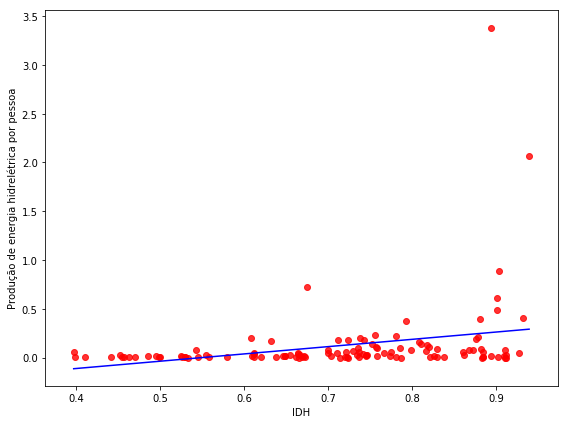

In [294]:
reta(dh['2010 IDH'],dh['2010 Produção de energia hidrelétrica por pessoa'], 'Produção de energia hidrelétrica por pessoa')

# IDH vs porcentagem de area florestada

Ajuste linear entre X3 e X4:
Coeficiente linear: 26.24330272136389
Coeficiente angular: 7.1971198903560225


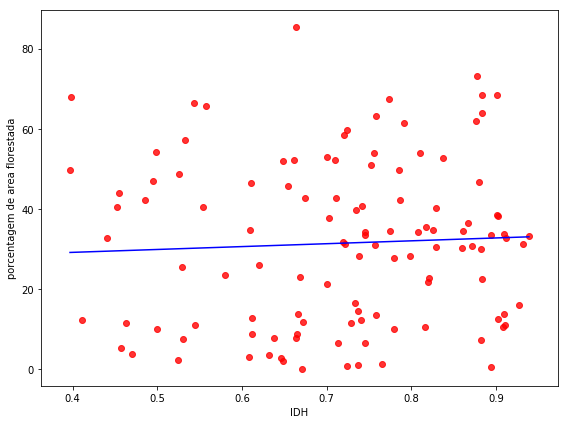

In [295]:
reta(dh['2010 IDH'],dh['2010 porcentagem de area florestada'], 'porcentagem de area florestada')

# Análise

In [296]:
dh.corr()

,2010 IDH,2010 Produção de energia hidrelétrica por pessoa,2010 porcentagem de area florestada
2010 IDH,1.000000,0.277349,0.050001
2010 Produção de energia hidrelétrica por pessoa,0.277349,1.000000,-0.016517
2010 porcentagem de area florestada,0.050001,-0.016517,1.000000


# Área florestada

In [297]:
dh.sort_values('2010 porcentagem de area florestada', ascending = False).head(10)

,2010 IDH,2010 Produção de energia hidrelétrica por pessoa,2010 porcentagem de area florestada
Países,,,
Gabon,0.664,0.04620,85.4
Finland,0.878,0.20700,73.1
Japan,0.884,0.05590,68.5
Sweden,0.901,0.60900,68.4
"Congo, Dem. Rep.",0.398,0.01020,68.0
Malaysia,0.774,0.01960,67.3
Zambia,0.543,0.07410,66.5
"Congo, Rep.",0.558,0.00915,65.6
South Korea,0.884,0.00657,64.0


    Como podemos ver a relação entre a porcentagem de area florestada e o IDH é quase aleatória, com uma correlação de 0.05, sendo 1 e -1 os melhores valores possivéis. A tabela anterior mostra que 4 dos top 10 países possuem um IDH maior que 0,8 e 6 com IDH maior que 0,7, o que corrobora com a idea de desconexão entre os dois aspectos análisados. 
    Porém ao verificar que na lista dos top 10 países com os maiores IDH's nenhum possui mais que um terço de área florestada percebi que o a região onde o país está localizado é quem realmente influência a porcentagem de área florestada. Um exemplo é a Australia, que possuí apenas 16% de florestas, mas isso ocorre devido ao enorme deserto que quase domina o país, inicialmente pensei que os países mais desenvolvidos possuíam menos florestas devido á expansão urbana e industrial, mas essa hipótese não se sustentou.

# Produção de energia hidrelétrica por pessoa

In [298]:
dh.sort_values('2010 Produção de energia hidrelétrica por pessoa', ascending = False).head(10)

,2010 IDH,2010 Produção de energia hidrelétrica por pessoa,2010 porcentagem de area florestada
Países,,,
Iceland,0.894,3.380,0.43
Norway,0.939,2.070,33.10
Canada,0.903,0.888,38.20
Paraguay,0.675,0.720,42.70
Sweden,0.901,0.609,68.40
New Zealand,0.901,0.486,38.50
Switzerland,0.932,0.405,31.30
Austria,0.880,0.393,46.80
Montenegro,0.792,0.374,61.50


    Agora vendo a relação entre a produção de energia hidrelétrica por pessoa e o IDH, que é de 0.27, um valor ainda muito baixo para ser considerado como 'influenciador' direto do IDH, porém ao ver a lista dos top 10 produtores de energia hidrelétrica perebemos que 7 deles possuem um IDH maior que 0,8, e o único com um IDH a baixo de 0,7 é o Paraguay, essa anomalia pode ser explicada pela enorme produção de energia da represa de Itaipu. Portanto deve existir alguma relação entre os dois certo?

    Porcentagem de energia renovável consumida
    fonte: http://hdr.undp.org/en/composite/Dashboard2

In [308]:
Energy = pd.read_excel('2016_Statistical_Annex_Dashboard_2.xlsx')
Energy_2012 = Energy.loc[:, ["Países", 2012]]
Energy_idx = Energy_2012.set_index("Países")
Energy_ = Energy_idx.dropna()
#Energy_.sort_values(2012, ascending = False)
Energy_.loc[['Iceland', 'Norway', 'Canada', 'Paraguay', 'Sweden', 'New Zealand', \
             'Switzerland', 'Austria', 'Montenegro'],:]

,2012
Países,
Iceland,78.1393
Norway,58.0179
Canada,20.5987
Paraguay,62.6775
Sweden,49.9132
New Zealand,30.7801
Switzerland,22.6829
Austria,34.4506
Montenegro,46.1955


Errado! Apenas 4 dos países da tabela anterior consomem mais energia renovável do que não renovável, o que não explica a relação vista anteriormente, podendo assim ser uma simples conhecidencia.

Gustavo Schlieper Tessitore